In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
from PIL import Image

def apply_gamma(v):
    if v <= 0.0031308:
        v_prime = v*3294.6
    elif v > 0.0031308:
        v_prime = 255*(1.055*(v**0.41666) - 0.055)
    elif v < 0:
        v_prime = v*3294.6
    return v_prime


def remove_gamma(v):
    if v <= 0.04045*255:
        v_prime = v/(255*12.92)
    elif v > 0.04045*255:
        v_prime = (((v/255) + 0.055)/1.055)**2.4
    return v_prime

t_rgb_xyz = np.array([[0.4124564,0.3575761,0.1804375],[0.2126729,0.7151522,0.0721750],[0.0193339,0.1191920,0.9503041]])
    
t_xyz_lms = np.array([[0.4002,0.7076,-0.0808],[-0.2263,1.1653,0.0457],[0,0,0.9182]])

t_rgb_lms = t_rgb_xyz.dot(t_xyz_lms)
t_lms_rgb = np.linalg.inv(t_rgb_lms)

In [ ]:

T = t_xyz_lms.dot(t_rgb_xyz)
print(T)

blue_lms = T.dot([[0],[0],[1]])
#print(blue_lms)


white_lms = T.dot([[1],[1],[1]])
#print(white_lms)

q1 = ((blue_lms[0] * white_lms[2]) - (white_lms[0] * blue_lms[2])) / ((blue_lms[1] * white_lms[2]) - (white_lms[1] * blue_lms[2]))
print(q1)

q2 = ((blue_lms[0] * white_lms[1]) - (white_lms[0] * blue_lms[1])) / ((blue_lms[2] * white_lms[1]) - (white_lms[2] * blue_lms[1]))
print(q2)

t_sim = np.array([[0,1.05118294,-0.05116099],[0,1,0],[0,0,1]])


[[0.31399022 0.63951294 0.04649755]
 [0.15537241 0.75789446 0.08670142]
 [0.01775239 0.10944209 0.87256922]]
[1.05118294]
[-0.05116099]


In [ ]:
#downloading simulated images
from os import listdir


path = '/content/gdrive/MyDrive/CVD/dataset2_recoloured_images/'
imagesList = listdir(path)
print(imagesList)

imagesList1 = imagesList[:10]
imagesList2 = imagesList[0:10]
print(imagesList2)

for everyimage in imagesList2:
    image_name = everyimage
    try_image = cv.imread(path + everyimage)
    image_array = np.array(try_image)
    image_array = np.asfarray(image_array)
    dimension = list()
    dimension = image_array.shape 
    for i in range(dimension[0]):
        for j in range(dimension[1]):
            pixel_array = np.array(image_array[i][j])
            image_array = np.asfarray(image_array)
            np.resize(pixel_array, (3,1))
            pixel_array = np.asfarray(pixel_array)
            for n in range(3):
                pixel_array[n] = remove_gamma(pixel_array[n])

            pixel_array = t_rgb_xyz.dot(pixel_array)
            pixel_array_o = pixel_array
            pixel_array = t_xyz_lms.dot(pixel_array)
            pixel_array = t_sim.dot(pixel_array)
            
            for x in range(3):
                if pixel_array[x] < 0:
                    pixel_array[x] = 0
                elif pixel_array[x]>1:
                  pixel_array[x] =  1
            image_array[i][j] = pixel_array
    plt.imsave('file_{0}_.jpeg'.format(image_name), image_array)
    

    with open('file_{0}_.jpeg'.format(image_name)):

        files.download('file_{0}_.jpeg'.format(image_name))
        

['recoloured_image_01701.jpg.jpeg', 'recoloured_image_02407.jpg.jpeg', 'recoloured_image_01821.jpg.jpeg', 'recoloured_image_03564.jpg.jpeg', 'recoloured_image_07599.jpg.jpeg', 'recoloured_image_01832.jpg.jpeg', 'recoloured_image_06930.jpg.jpeg', 'recoloured_image_04827.jpg.jpeg', 'recoloured_image_03604.jpg.jpeg', 'recoloured_image_03558.jpg.jpeg', 'recoloured_image_01348.jpg.jpeg', 'recoloured_image_03433.jpg.jpeg', 'recoloured_image_02290.jpg.jpeg', 'recoloured_image_02776.jpg.jpeg', 'recoloured_image_07545.jpg.jpeg', 'recoloured_image_01046.jpg.jpeg', 'recoloured_image_03521.jpg.jpeg', 'recoloured_image_06811.jpg.jpeg', 'recoloured_image_00678.jpg.jpeg', 'recoloured_image_07747.jpg.jpeg', 'recoloured_image_04837.jpg', 'recoloured_image_03636.jpg', 'recoloured_image_07731.jpg', 'recoloured_image_03862.jpg', 'recoloured_image_07996.jpg', 'recoloured_image_02879.jpg', 'recoloured_image_02262.jpg', 'recoloured_image_03579.jpg', 'recoloured_image_00774.jpg', 'recoloured_image_06814.jpg',

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#downloading recoloured images
import math
from os import listdir
import matplotlib.pyplot as plt
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files
import cv2 as cv

path = '/content/gdrive/MyDrive/CVD/dataset2_original_images/'
imagesList = listdir(path)
print(imagesList)

imagesList1 = imagesList[:10]



['image_01701.jpg', 'image_03604.jpg', 'image_07599.jpg', 'image_02407.jpg', 'image_03564.jpg', 'image_03558.jpg', 'image_06930.jpg', 'image_04827.jpg', 'image_01832.jpg', 'image_01821.jpg', 'image_03433.jpg', 'image_02290.jpg', 'image_01348.jpg', 'image_06811.jpg', 'image_02776.jpg', 'image_03521.jpg', 'image_01046.jpg', 'image_07545.jpg', 'image_00678.jpg', 'image_07747.jpg', 'image_04837.jpg', 'image_03636.jpg', 'image_07731.jpg', 'image_02262.jpg', 'image_07996.jpg', 'image_03862.jpg', 'image_03579.jpg', 'image_02879.jpg', 'image_06814.jpg', 'image_00774.jpg', 'image_00504.jpg', 'image_03441.jpg', 'image_00180.jpg', 'image_02782.jpg', 'image_00679.jpg', 'image_00965.jpg', 'image_03386.jpg', 'image_04477.jpg', 'image_03445.jpg', 'image_02705.jpg', 'image_00757.jpg', 'image_00593.jpg', 'image_07980.jpg', 'image_02708.jpg', 'image_06893.jpg', 'image_01969.jpg', 'image_04820.jpg', 'image_03828.jpg', 'image_01113.jpg', 'image_02761.jpg', 'image_08035.jpg', 'image_08041.jpg', 'image_0799

In [ ]:
imagesList2 = imagesList[390:400]
print(imagesList2)


for everyimage in imagesList2:
    image_name = everyimage
    try_image = cv.imread(path + everyimage)
    image_array = np.array(try_image)
    image_array = np.asfarray(image_array)
    dimension = list()
    dimension = image_array.shape 
    for i in range(dimension[0]):
        for j in range(dimension[1]):
            pixel_array = np.array(image_array[i][j])
            image_array = np.asfarray(image_array)
            np.resize(pixel_array, (3,1))
            pixel_array = np.asfarray(pixel_array)
            for n in range(3):
                pixel_array[n] = remove_gamma(pixel_array[n])

            pixel_array = t_rgb_xyz.dot(pixel_array)
            pixel_array_o = pixel_array
            pixel_array = t_xyz_lms.dot(pixel_array)
            pixel_array = t_sim.dot(pixel_array)
            pixel_array_s = pixel_array
            E_x = abs(pixel_array_o[0] - pixel_array_s[0])
            E_z = abs(pixel_array_o[2] - pixel_array_s[2])
            theta_o = math.atan(pixel_array_o[2]/pixel_array_o[0])
            theta_s = math.atan(pixel_array_s[2]/pixel_array_s[0])
            phi = abs(theta_o - theta_s)
            s,c = np.sin(phi), np.cos(phi)
            t_rotation = np.array([[s,c], [c,-s]])
            E = np.array([[E_x], [E_z]])
            E_bar = t_rotation.dot(E)
            pixel_array_s[0] = pixel_array_o[0] + E_bar[0][0]
            pixel_array_s[1] = pixel_array_o[1]
            pixel_array_s[2] = pixel_array_o[2] + E_bar[0][0] + E_bar[1][0]
            pixel_array_s = t_lms_rgb.dot(pixel_array_s)
            for x in range(3):
                if pixel_array_s[x] < 0:
                    pixel_array_s[x] = 0
                elif pixel_array_s[x]>1:
                  pixel_array_s[x] =  1
            image_array[i][j] = pixel_array_s
    plt.imsave('recoloured_{0}'.format(image_name), image_array)
    

    with open('recoloured_{0}'.format(image_name)):

        files.download('recoloured_{0}'.format(image_name))


['image_08217.jpg', 'image_08216.jpg', 'image_08215.jpg', 'image_08214.jpg', 'image_08213.jpg', 'image_08212.jpg', 'image_08211.jpg', 'image_08210.jpg', 'image_08209.jpg', 'image_08208.jpg']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#xyz values of image as perceived by the color blindd
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
drive.mount('/content/gdrive')


i = "/content/gdrive/MyDrive/CVD/dataset_original_images/image9.jpg"
test_image1 = Image.open(i)
image_array1 = np.array(test_image1 )
image_array1 = np.asfarray(image_array1)
dimension1 = list()
dimension1 = image_array1.shape 

plt.imshow(mpimg.imread(i))


for i in range(dimension1[0]):
    for j in range(dimension1[1]):
        pixel_array1 = np.array(image_array1[i][j])
        image_array1 = np.asfarray(image_array1)
        np.resize(pixel_array1, (3,1))
        pixel_array1 = np.asfarray(pixel_array1)
        for n in range(3):
            pixel_array1[n] = remove_gamma(pixel_array1[n])
        
        pixel_array1 = t_rgb_xyz.dot(pixel_array1)
        pixel_array1 = t_xyz_lms.dot(pixel_array1)
        pixel_array1 = t_sim.dot(pixel_array1)
        for x in range(3):
            if pixel_array1[x] < 0:
                pixel_array1[x] = 1 - pixel_array1[x]
        image_array1[i][j] = pixel_array1

print(image_array1[0][0])

Mounted at /content/gdrive


FileNotFoundError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


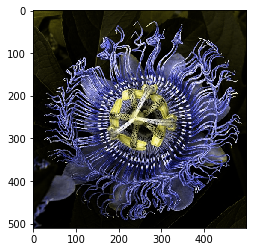

In [ ]:
plt.imshow(image_array1, interpolation='nearest')
plt.show()

In [ ]:
#xyz values as perceived by normal people

import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
import math


i = "/content/gdrive/MyDrive/CVD/dataset_original_images/image9.jpg"
test_image2 = Image.open(i)
image_array2= np.array(test_image2 )
image_array2 = np.asfarray(image_array2)
dimension2 = list()
dimension2= image_array2.shape 

#plt.imshow(mpimg.imread(i))


for i in range(dimension2[0]):
    for j in range(dimension2[1]):
        pixel_array2 = np.array(image_array2[i][j])
        image_array2 = np.asfarray(image_array2)
        np.resize(pixel_array2, (3,1))
        pixel_array2 = np.asfarray(pixel_array2)
        #if(pixel_array2[2]<=pixel_array2[0]/1.5 and pixel_array2[1]<=pixel_array2[0]/1.5):
        for n in range(3):
            pixel_array2[n] = remove_gamma(pixel_array2[n])
        
        pixel_array2 = t_rgb_xyz.dot(pixel_array2)
        pixel_array2_o = pixel_array2

        pixel_array2 = t_xyz_lms.dot(pixel_array2)
        pixel_array2 = t_sim.dot(pixel_array2)
        pixel_array2_s = pixel_array2
        E_x = abs(pixel_array2_o[0] - pixel_array2_s[0])
        E_z = abs(pixel_array2_o[2] - pixel_array2_s[2])
        theta_o = math.atan(pixel_array2_o[2]/pixel_array2_o[0])
        theta_s = math.atan(pixel_array2_s[2]/pixel_array2_s[0])
        phi = abs(theta_o - theta_s)
        s,c = np.sin(phi), np.cos(phi)
        t_rotation = np.array([[s,c], [c,-s]])
        E = np.array([[E_x], [E_z]])
        E_bar = t_rotation.dot(E)
        pixel_array2_s[0] = pixel_array2_o[0] + E_bar[0][0]
        pixel_array2_s[1] = pixel_array2_o[1]
        pixel_array2_s[2] = pixel_array2_o[2] + E_bar[0][0] + E_bar[1][0]
        pixel_array2_s = t_lms_rgb.dot(pixel_array2_s)
          #for n in range(3):
            #pixel_array2_s[n] = apply_gamma(pixel_array2_s[n])
        image_array2[i][j] = pixel_array2_s


print(image_array2[0][0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars


[-0.12493608  0.1575999   0.13014689]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


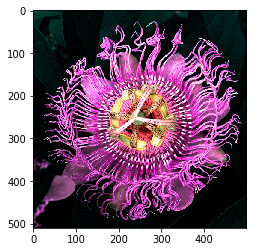

In [ ]:
plt.imshow(image_array2, interpolation='nearest')
plt.show()

## **The original image:**

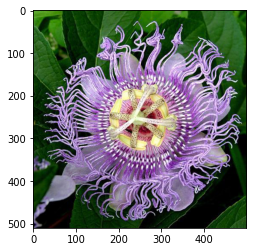

In [ ]:
i = "/content/gdrive/MyDrive/CVD/dataset_original_images/image9.jpg"
plt.imshow(mpimg.imread(i))

## **Perceived by protanopes:**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


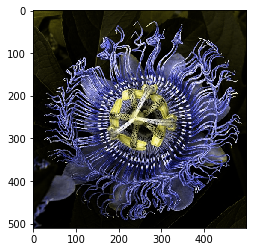

In [ ]:
plt.imshow(image_array1, interpolation='nearest')
plt.show()

## **After applying recoloring algorithm:**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


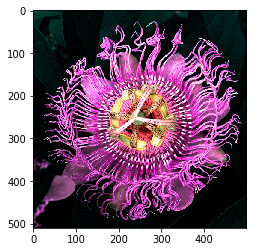

In [ ]:
plt.imshow(image_array2, interpolation='nearest')
plt.show()